In [38]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('china_articles_analyzed.csv')
print(len(df))

276209


In [5]:
print(df.columns)

Index(['date', 'year', 'month', 'day', 'author', 'title', 'article', 'url',
       'section', 'publication', 'TextBlob_sentiment', 'TextBlob_subjectivity',
       'NLTK_sentiment'],
      dtype='object')


In [3]:
import matplotlib.pyplot as plt

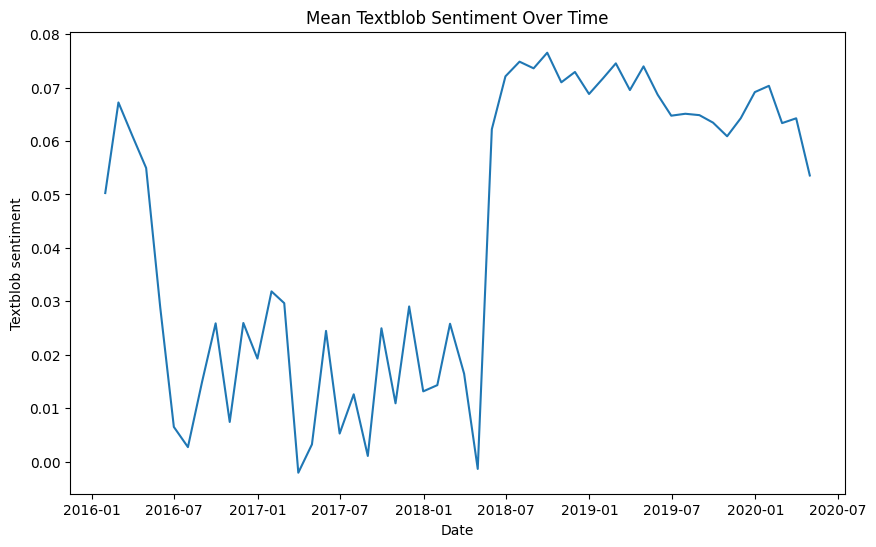

In [40]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate the mean sentiment
grouped = df.groupby(pd.Grouper(key='date', freq='M'))
sentiments_by_month = grouped['TextBlob_sentiment'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sentiments_by_month.index, sentiments_by_month)
plt.xlabel('Date')
plt.ylabel('Textblob sentiment')
plt.title('Mean Textblob Sentiment Over Time')
plt.show()

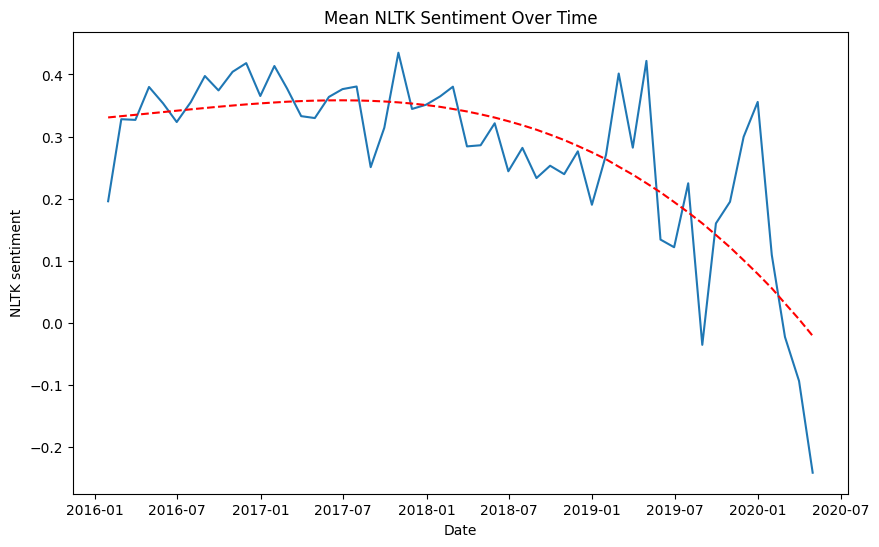

In [41]:
sentiments_by_month = grouped['NLTK_sentiment'].mean()

x = np.arange(len(sentiments_by_month))
y = sentiments_by_month.values
coeffs = np.polyfit(x, y, 3)
line = np.polyval(coeffs, x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sentiments_by_month.index, sentiments_by_month)
plt.plot(sentiments_by_month.index, line, 'r--', label='Line of best fit')
plt.xlabel('Date')
plt.ylabel('NLTK sentiment')
plt.title('Mean NLTK Sentiment Over Time')
plt.show()

In [43]:
# Calculate correlation coefficient and R-squared value
corr_coef = np.corrcoef(x, y)[0, 1]
r_squared = np.corrcoef(x, y)[0, 1]**2

# Print the results
print(f'Equation of the line: y = {coeffs[0]:.6f}x^3 + {coeffs[1]:.6f}x^2 + {coeffs[2]:.6f}x + {coeffs[3]:.6f}')
print(f'Correlation coefficient: {corr_coef:.4f}')
print(f'R-squared value: {r_squared:.4f}')

Equation of the line: y = -0.000004x^3 + 0.000052x^2 + 0.002023x + 0.330792
Correlation coefficient: -0.6381
R-squared value: 0.4072


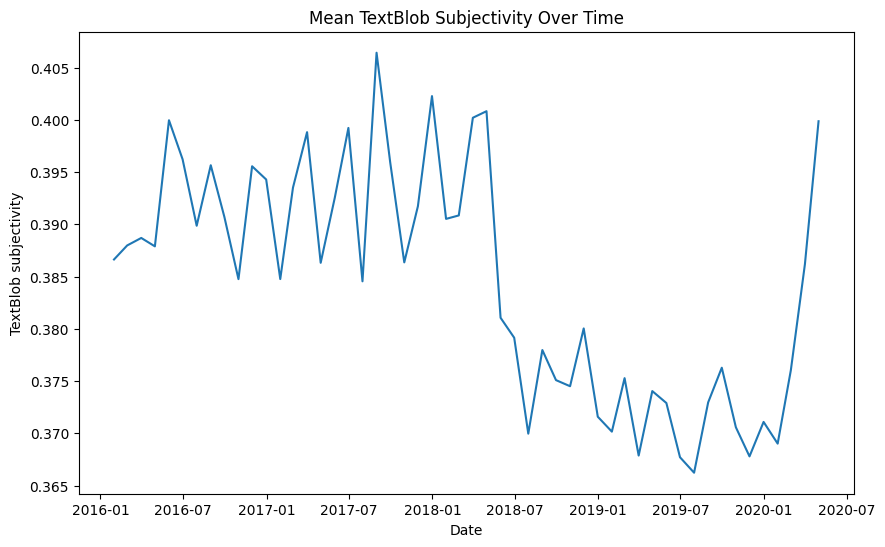

In [12]:
sentiments_by_month = grouped['TextBlob_subjectivity'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sentiments_by_month.index, sentiments_by_month)
plt.xlabel('Date')
plt.ylabel('TextBlob subjectivity')
plt.title('Mean TextBlob Subjectivity Over Time')
plt.show()

In [13]:
# Assuming your DataFrame is named "df"
mean_sentiment = df['TextBlob_sentiment'].mean()
std_sentiment = df['TextBlob_sentiment'].std()

mean_subjectivity = df['TextBlob_subjectivity'].mean()
std_subjectivity = df['TextBlob_subjectivity'].std()

mean_nltk_sentiment = df['NLTK_sentiment'].mean()
std_nltk_sentiment = df['NLTK_sentiment'].std()

print("TextBlob Sentiment: mean={}, std={}".format(mean_sentiment, std_sentiment))
print("TextBlob Subjectivity: mean={}, std={}".format(mean_subjectivity, std_subjectivity))
print("NLTK Sentiment: mean={}, std={}".format(mean_nltk_sentiment, std_nltk_sentiment))

TextBlob Sentiment: mean=0.04772201962524654, std=0.10024847567820772
TextBlob Subjectivity: mean=0.3818489699378537, std=0.08988437013542434
NLTK Sentiment: mean=0.24748265262898747, std=0.7973429814585029


In [21]:
means_by_publication = df.groupby('publication').mean(numeric_only = True)

print(means_by_publication[['TextBlob_sentiment', 'TextBlob_subjectivity', 'NLTK_sentiment']])

                    TextBlob_sentiment  TextBlob_subjectivity  NLTK_sentiment
publication                                                                  
Axios                         0.068017               0.369070        0.145592
Business Insider              0.093376               0.407072        0.146701
CNBC                          0.067343               0.379711        0.257184
Economist                     0.071117               0.382985        0.237322
Fox News                      0.072459               0.397252        0.244854
Reuters                       0.015254               0.374609        0.249755
The Hill                      0.106236               0.396613        0.169393
The New York Times            0.082175               0.395108        0.323581
Vox                           0.094838               0.431663        0.380953
Washington Post               0.099951               0.413733        0.259355


In [22]:
import numpy as np
import scipy.stats as stats

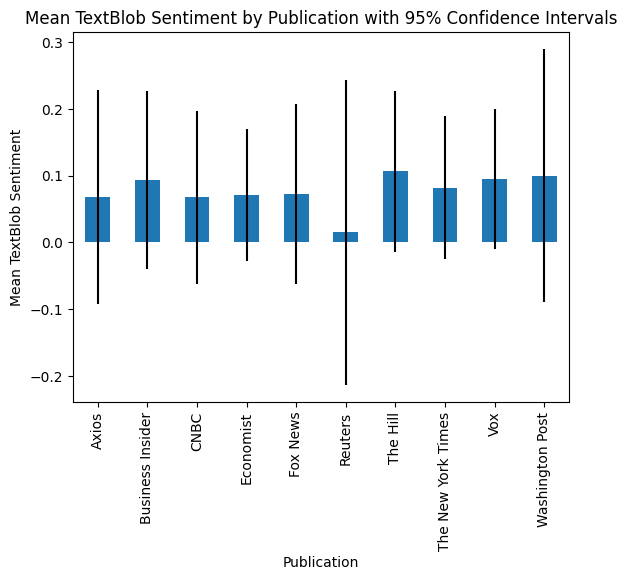

In [33]:
grouped = df.groupby('publication')['TextBlob_sentiment'].agg(['mean', 'sem'])

# Calculate the number of observations for each publication
n_by_publication = df.groupby('publication').size()

# Calculate the t-value for a 95% confidence interval
t = stats.t.ppf(0.975, n_by_publication - 1)

# Calculate the error values for each column by publication
error_by_publication = t * grouped['sem'] * np.sqrt(n_by_publication)

# Create a bar chart of TextBlob_sentiment by publication with error bars
grouped['mean'].plot(kind='bar', yerr=error_by_publication)

# Set the plot title and axis labels
plt.title('Mean TextBlob Sentiment by Publication with 95% Confidence Intervals')
plt.xlabel('Publication')
plt.ylabel('Mean TextBlob Sentiment')

# Show the plot
plt.show()

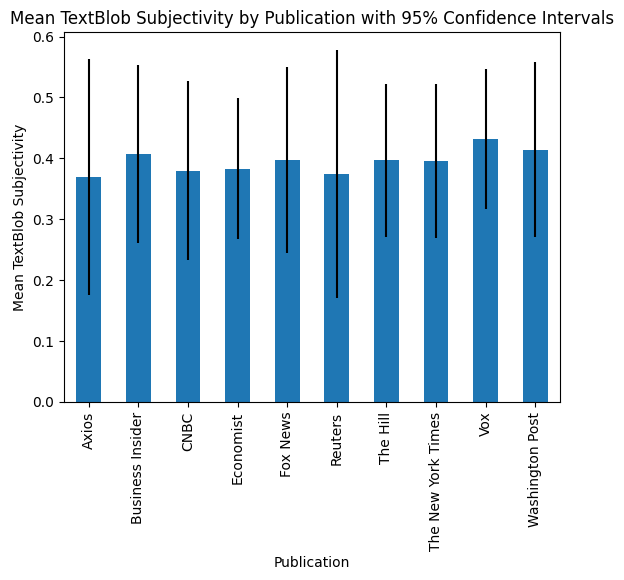

In [34]:
grouped = df.groupby('publication')['TextBlob_subjectivity'].agg(['mean', 'sem'])

# Calculate the number of observations for each publication
n_by_publication = df.groupby('publication').size()

# Calculate the t-value for a 95% confidence interval
t = stats.t.ppf(0.975, n_by_publication - 1)

# Calculate the error values for each column by publication
error_by_publication = t * grouped['sem'] * np.sqrt(n_by_publication)

# Create a bar chart of TextBlob_sentiment by publication with error bars
grouped['mean'].plot(kind='bar', yerr=error_by_publication)

# Set the plot title and axis labels
plt.title('Mean TextBlob Subjectivity by Publication with 95% Confidence Intervals')
plt.xlabel('Publication')
plt.ylabel('Mean TextBlob Subjectivity')

# Show the plot
plt.show()

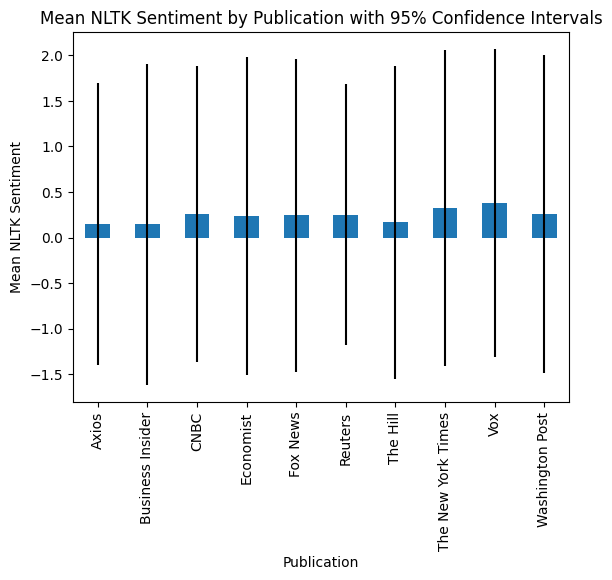

In [35]:
grouped = df.groupby('publication')['NLTK_sentiment'].agg(['mean', 'sem'])

# Calculate the number of observations for each publication
n_by_publication = df.groupby('publication').size()

# Calculate the t-value for a 95% confidence interval
t = stats.t.ppf(0.975, n_by_publication - 1)

# Calculate the error values for each column by publication
error_by_publication = t * grouped['sem'] * np.sqrt(n_by_publication)

# Create a bar chart of TextBlob_sentiment by publication with error bars
grouped['mean'].plot(kind='bar', yerr=error_by_publication)

# Set the plot title and axis labels
plt.title('Mean NLTK Sentiment by Publication with 95% Confidence Intervals')
plt.xlabel('Publication')
plt.ylabel('Mean NLTK Sentiment')

# Show the plot
plt.show()

In [92]:
df_topic_analysis = pd.read_csv('china_articles_topic_modeled.csv')

In [93]:
print(df_topic_analysis.columns)

Index(['Unnamed: 0', 'date', 'year', 'month', 'day', 'author', 'title',
       'article', 'url', 'section', 'publication', 'TextBlob_sentiment',
       'TextBlob_subjectivity', 'NLTK_sentiment', 'processed_article',
       'topic_distribution'],
      dtype='object')


In [103]:
import ast
print(df_topic_analysis.iloc[0, 15])
print(str(df_topic_analysis.iloc[0, 15]))
print(ast.literal_eval(str(df_topic_analysis.iloc[0, 15])))

[(0, 0.02010362), (1, 0.033028085), (3, 0.9461909)]
[(0, 0.02010362), (1, 0.033028085), (3, 0.9461909)]
(1, 0.033028085)


In [61]:
from gensim.models.ldamodel import LdaModel
loaded_model = LdaModel.load('lda_model.sav')

In [62]:
loaded_model.print_topics(num_topics=10, num_words=20)

[(0,
  '0.026*"trump" + 0.016*"presid" + 0.010*"state" + 0.010*"\'s" + 0.010*"said" + 0.009*"’" + 0.008*"``" + 0.008*"u.s." + 0.008*"\'\'" + 0.007*"hous" + 0.007*"would" + 0.007*"democrat" + 0.006*"american" + 0.006*"senat" + 0.006*"administr" + 0.006*"“" + 0.006*"”" + 0.005*"washington" + 0.005*"—" + 0.005*"unit"'),
 (1,
  '0.012*"market" + 0.011*"said" + 0.009*"u.s." + 0.009*"trade" + 0.008*"china" + 0.008*"’" + 0.008*"\'s" + 0.008*"bank" + 0.007*"stock" + 0.007*"report" + 0.007*"economi" + 0.007*"rate" + 0.006*"week" + 0.006*"year" + 0.006*"econom" + 0.006*"expect" + 0.005*"price" + 0.005*"global" + 0.005*"investor" + 0.005*"growth"'),
 (2,
  '0.043*"’" + 0.028*"“" + 0.028*"”" + 0.016*"said" + 0.012*"coronavirus" + 0.009*"peopl" + 0.008*"case" + 0.008*"virus" + 0.007*"china" + 0.007*"health" + 0.005*"report" + 0.005*"govern" + 0.005*"new" + 0.005*"countri" + 0.005*"state" + 0.004*"offici" + 0.004*"infect" + 0.004*"hospit" + 0.004*"citi" + 0.004*"test"'),
 (3,
  '0.018*"said" + 0.013

In [105]:
def series_to_list(x):
    return ast.literal_eval(str(x))
#print(df_topic_analysis.iloc[:1, 15])

In [106]:
df_topic_analysis['topic_distribution'] = df_topic_analysis['topic_distribution'].apply(lambda x: series_to_list(x))

In [108]:
num_topics = 5
def get_topic_score(topic_distribution, topic_num):
    for topic in topic_distribution:
        if topic[0] == topic_num:
            return topic[1]
    return 0

# Loop over each topic and add a new column with the topic score
for i in range(num_topics):
    topic_name = f"topic_{i}_score"
    df_topic_analysis[topic_name] = df_topic_analysis['topic_distribution'].apply(lambda x: get_topic_score(x, i))



Index(['Unnamed: 0', 'date', 'year', 'month', 'day', 'author', 'title',
       'article', 'url', 'section', 'publication', 'TextBlob_sentiment',
       'TextBlob_subjectivity', 'NLTK_sentiment', 'processed_article',
       'topic_distribution', 'topic_0_score', 'topic_1_score', 'topic_2_score',
       'topic_3_score', 'topic_4_score'],
      dtype='object')


In [117]:
df_topic_analysis.to_csv('cat_separated.csv')

In [121]:
correlations = df_topic_analysis.corr(numeric_only=True)
print(correlations)


                       Unnamed: 0      year     month       day  \
Unnamed: 0               1.000000  0.569862 -0.037311 -0.004162   
year                     0.569862  1.000000 -0.189127 -0.002154   
month                   -0.037311 -0.189127  1.000000 -0.035141   
day                     -0.004162 -0.002154 -0.035141  1.000000   
TextBlob_sentiment       0.225533  0.171501 -0.008006 -0.037184   
TextBlob_subjectivity   -0.005445 -0.085373 -0.009142  0.000470   
NLTK_sentiment          -0.092221 -0.125066  0.036304  0.013153   
topic_0_score            0.091824 -0.027634  0.010779 -0.027336   
topic_1_score           -0.154973 -0.012385  0.042816  0.011567   
topic_2_score            0.150931  0.081381 -0.058601  0.007701   
topic_3_score           -0.102728  0.021072 -0.029424  0.015404   
topic_4_score            0.110659 -0.047684  0.010062 -0.010568   

                       TextBlob_sentiment  TextBlob_subjectivity  \
Unnamed: 0                       0.225533              -0.00

In [122]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_topic_analysis['NLTK_sentiment'], df_topic_analysis['topic_0_score'])

print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

corr_coef, p_value = pearsonr(df_topic_analysis['NLTK_sentiment'], df_topic_analysis['topic_1_score'])

print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

corr_coef, p_value = pearsonr(df_topic_analysis['NLTK_sentiment'], df_topic_analysis['topic_2_score'])

print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

corr_coef, p_value = pearsonr(df_topic_analysis['NLTK_sentiment'], df_topic_analysis['topic_3_score'])

print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

corr_coef, p_value = pearsonr(df_topic_analysis['NLTK_sentiment'], df_topic_analysis['topic_4_score'])

print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.04626539692711466
P-value: 9.919641927994147e-131
Correlation coefficient: 0.039175384266519904
P-value: 2.939936987604287e-94
Correlation coefficient: -0.2126111930595563
P-value: 0.0
Correlation coefficient: 0.024461810292799993
P-value: 7.764353677829016e-38
Correlation coefficient: 0.19529170980075578
P-value: 0.0


In [123]:
def cohens_d(x1,x2):
    n1 = len(x1)
    n2 = len(x2)
    pooled_std = np.sqrt(((n1 - 1) * x1.std() ** 2 + (n2 - 1) * x2.std() ** 2) / (n1 + n2 - 2))
    d = (x1.mean() - x2.mean()) / pooled_std

    print('Cohen\'s d:', d)

In [126]:
df = None
df_topic_analysis = None